In [1]:
from google.colab import drive
drive.mount("/content/drive")

#to confirm gpu access
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print(device_name)

Mounted at /content/drive



In [2]:
!git clone "https://github.com/sydney-machine-learning/sentimentanalysis-Bible.git"

Cloning into 'sentimentanalysis-Bible'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 90 (delta 19), reused 60 (delta 12), pack-reused 0
Unpacking objects: 100% (90/90), done.


In [3]:
!pip3 install afinn
from afinn import Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=9d8cd6e2af95de662bebd2de16c0433c89915dc983d8d9a1de372f14ffe73884
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [4]:
import os

In [5]:
!ls

drive  sample_data  sentimentanalysis-Bible


In [6]:
os.chdir("drive/MyDrive/sentimentanalysis-Bible-main")

In [7]:
afinn = Afinn(language='en')

In [8]:
pos_index = []
neg_index = []
neutral_index = []
most_pos = []

In [9]:
chapters = ["Chapter-5_cleaned", "Chapter-6_cleaned", "Chapter-7_cleaned"]
for i in range(3):
  chapter = open('New Revised Standard Version/'+ chapters[i] + '.txt')
  data = chapter.read()
  sentences = data.split('.')
  print(data)
  pos = 0
  neg = 0
  neutral = 0

  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      neg+=1
    else:
      neutral+=1
  scored_sentences = ((afinn.score(sent), sent) for sent in sentences)
  sorted_sentences = sorted(scored_sentences)
  n = len(sentences)
  pos_index.append(pos/n)
  neg_index.append(neg/n)
  neutral_index.append(neutral/n)
  most_pos.append(sorted_sentences)

5 When Jesus saw the crowds, he went up the mountain; and after he sat down, his disciples came to him. 2 Then he began to speak, and taught them, saying:

3 ‘Blessed are the poor in spirit, for theirs is the kingdom of heaven.

4 ‘Blessed are those who mourn, for they will be comforted.

5 ‘Blessed are the meek, for they will inherit the earth.

6 ‘Blessed are those who hunger and thirst for righteousness, for they will be filled.

7 ‘Blessed are the merciful, for they will receive mercy.

8 ‘Blessed are the pure in heart, for they will see God.

9 ‘Blessed are the peacemakers, for they will be called children of God.

10 ‘Blessed are those who are persecuted for righteousness’ sake, for theirs is the kingdom of heaven.

11 ‘Blessed are you when people revile you and persecute you and utter all kinds of evil against you falsely on my account. 12 Rejoice and be glad, for your reward is great in heaven, for in the same way they persecuted the prophets who were before you.

13 ‘You are t

In [10]:
neg_index

[0.32558139534883723, 0.18181818181818182, 0.13636363636363635]

In [11]:
neutral_index

[0.2558139534883721, 0.21212121212121213, 0.6363636363636364]

In [12]:
most_pos

[[(-13.0,
   '” 22 But I say to you that if you are angry with a brother or sister, you will be liable to judgement; and if you insult a brother or sister, you will be liable to the council; and if you say, “You fool”, you will be liable to the hell of fire'),
  (-7.0,
   '\n\n11 ‘Blessed are you when people revile you and persecute you and utter all kinds of evil against you falsely on my account'),
  (-5.0,
   ' 30 And if your right hand causes you to sin, cut it off and throw it away; it is better for you to lose one of your members than for your whole body to go into hell'),
  (-4.0,
   '\n\n21 ‘You have heard that it was said to those of ancient times, “You shall not murder”; and “whoever murders shall be liable to judgement'),
  (-4.0,
   '\n\n33 ‘Again, you have heard that it was said to those of ancient times, “You shall not swear falsely, but carry out the vows you have made to the Lord'),
  (-4.0,
   ' 29 If your right eye causes you to sin, tear it out and throw it away; it 

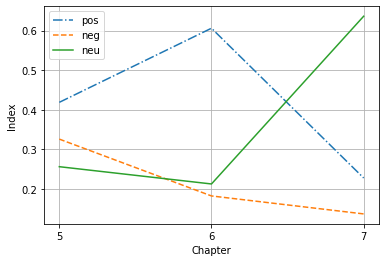

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(5,8)
plt.plot(X,pos_index,'-.',label='pos')
plt.plot(X,neg_index, '--',label='neg')
plt.plot(X,neutral_index,'-',label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Chapter')
plt.ylabel('Index')
plt.grid()
plt.savefig('afinn-bsi.png')
plt.show()  

In [14]:
##imports
!pip install torch
import torch
import pandas as pd
# !pip install onnx
# import onnx
# !pip install onnx-tf
# from onnx_tf.backend import prepare

!pip install transformers==4.10

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import pandas as pd

import spacy
# spacy_en = spacy.load('en')
import re

from torch.utils.data import DataLoader

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 5.2 MB/s 
     |████████████████████████████████| 163 kB 45.9 MB/s 
     |████████████████████████████████| 3.3 MB 28.9 MB/s 
     |████████████████████████████████| 880 kB 52.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=a9f5092e4e376089649c564620e64526c77b0901b807def62b3fd12a2ac0d9e8
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [15]:
PATH = "/content/drive/MyDrive/bertmodel.pth"

In [16]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze --local > /content/drive/My\ Drive/colab_installed.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 11)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = BERT()
model

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

#Cleaning

In [29]:
import re
def clean(version):
  filenames = ["Chapter-5_cleaned", "Chapter-6_cleaned", "Chapter-7_cleaned"]

  for i in range(len(filenames)):

      filename = version + "/" + filenames[i] + ".txt"
      data = ""
      with open(filename, 'r', encoding='utf-8') as f:
          data = f.read()
          f.close()
          

      data = data.replace("\n", " ")
      data = re.sub(r'\s+', " ", data)
      data = data.lower()

      data = re.sub('[^a-zA-Z0-9\n\.]', ' ', data)
      data = re.sub(r'\s+', " ", data)
      sentences = re.split("[0-9]+", data)
      sentences = [s.strip() for s in sentences]

      output_file = version + "/" + filenames[i] + ".csv"

      with open(output_file, 'w', encoding='utf-8') as f:
          f.write("verse")
          f.write("\n")
          for i in range(len(sentences)):
              f.write(sentences[i])
              f.write("\n")
          f.close()
          
      file = pd.read_csv(output_file)
      header_list = ['verse']
      file.to_csv(output_file, header = header_list, index=False)


In [93]:
niv5 = pd.read_csv("New International Version/Chapter-5_cleaned.csv")
kjv5 = pd.read_csv("King James Version/Chapter-5_cleaned.csv")
nrsv5 = pd.read_csv("New Revised Standard Version/Chapter-5_cleaned.csv")
niv6 = pd.read_csv("New International Version/Chapter-6_cleaned.csv")
kjv6 = pd.read_csv("King James Version/Chapter-6_cleaned.csv")
nrsv6 = pd.read_csv("New Revised Standard Version/Chapter-6_cleaned.csv")
niv7 = pd.read_csv("New International Version/Chapter-7_cleaned.csv")
kjv7 = pd.read_csv("King James Version/Chapter-7_cleaned.csv")
nrsv7 = pd.read_csv("New Revised Standard Version/Chapter-7_cleaned.csv")

In [104]:
def plot(niv, kjv, nrsv, img):
  niv_scores=[]
  kjv_scores=[]
  nrsv_scores=[]
  for i in range(len(niv['verse'])):
    v=niv['verse'][i]
    v=v.split('.')
    pos=0
    for s in v:
      score=int(afinn.score(s))
      if score > 0:
        pos+=1
      elif score < 0:
        pos-=1
    niv_scores.append(pos)
  for i in range(len(kjv['verse'])):
    v=kjv['verse'][i].split('.')
    pos=0
    for s in v:
      score=int(afinn.score(s))
      if score > 0:
        pos+=1
      elif score < 0:
        pos-=1
    kjv_scores.append(pos)
  for i in range(len(nrsv['verse'])):
    v=nrsv['verse'][i].split('.')
    pos=0
    for s in v:
      score=int(afinn.score(s))
      if score > 0:
        pos+=1
      elif score < 0:
        pos-=1
    nrsv_scores.append(pos)
  # return niv_scores,kjv_scores
  f=plt.figure()
  f.set_figwidth(20)
  f.set_figheight(5)
  n=len(niv_scores)
  X = np.arange(1,n+1)
  plt.figure()
  plt.plot(X,niv_scores,'-',label='New International Version',color='lightcoral')
  plt.plot(X,kjv_scores,'-',label='King James Version',color='turquoise')
  plt.plot(X,nrsv_scores,'-',label='New Revised Standard Version',color='green')
  plt.legend()
  plt.xticks(X,rotation=90)
  plt.xlabel('Verse')
  plt.ylabel('Polarity')
  plt.savefig(img+'.png')
  plt.show()  


<Figure size 1440x360 with 0 Axes>

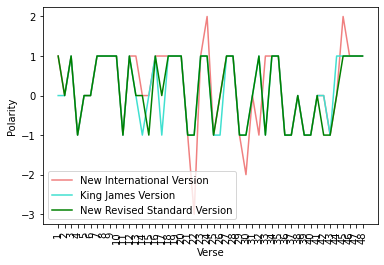

In [105]:
plot(niv5,kjv5,nrsv5,"verse_polarity_ch5")

<Figure size 1440x360 with 0 Axes>

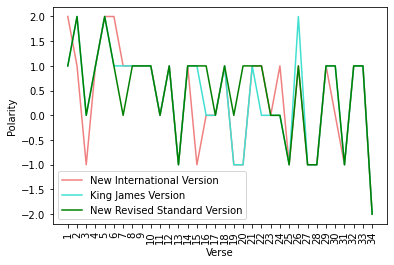

In [106]:
plot(niv6,kjv6,nrsv6,"verse_polarity_ch6")

<Figure size 1440x360 with 0 Axes>

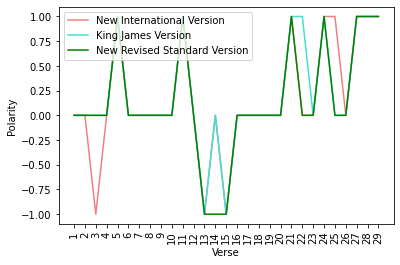

In [107]:
plot(niv7,kjv7,nrsv7,"verse_polarity_ch7")